# Task 6: Prediction using Decision Tree Algorithm

## Problem Statement: Create a decision tree classifier and visualize it.

### Maintained By: **Ajinkya Jadhav**

## Data Reading

In [1]:
# Load the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # to split the data
# to evaluate the model
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
#model and visualization library
from sklearn.tree import DecisionTreeClassifier , export_graphviz 
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data 
data = pd.read_csv('Iris.csv',index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# check shape of the dataset
data.shape

(150, 5)

There are **150 rows and 4 features** and **Species** is target column.

In [4]:
# check for presence of missing values 
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There is **no missing value present** in all the columns.

In [5]:
# check datatype of each feature
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Looks like first four features are `float`datatype and target is of `object` dtype which categorical.

In [6]:
# statistical description 
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


`describe()` gives us some statistical parameters such as **Mean**,**Median**,**Standard deviation**,etc. of features which is numerical type

In [7]:
# check for category in species column
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In `Species` target column there are three types of species.  
They are: 
- **Iris-setosa** 
- **Iris-versicolor** 
- **Iris-virginica**

In [8]:
# check for whether class imbalanced or not?
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

There is each species have equal observations. So dataset is of **balanced** type.

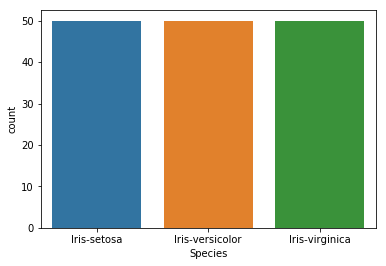

In [9]:
# we can visually see this using `countplot`
sns.countplot(data.Species);

## Exploratory Data Analysis

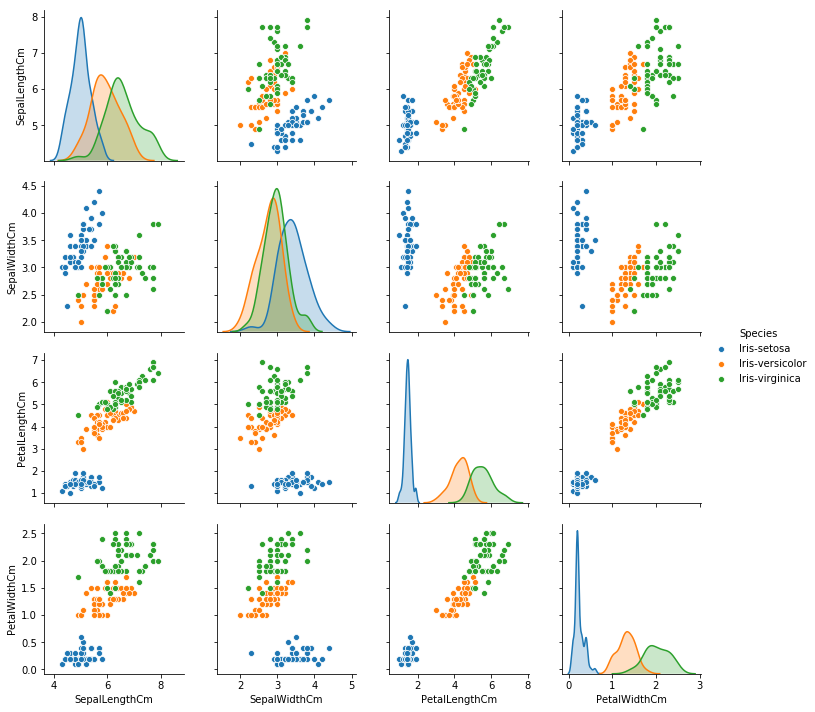

In [10]:
# plot the pairplot
sns.pairplot(data = data, hue = "Species");

#### Observation:
- By plotting `PetalLengthCm` against other three features visually looks splits the data clearly.
- Similar for the `PetalWidthCm`.

In [11]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

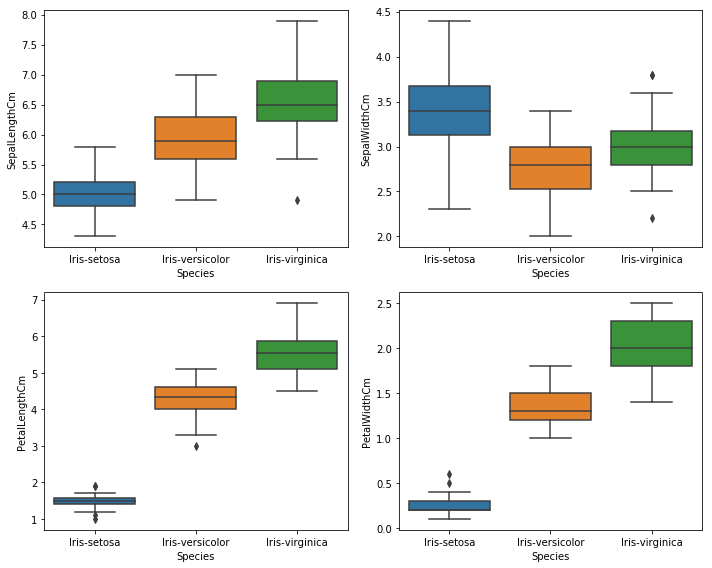

In [12]:
# plot the boxplot 
plt.figure(figsize=(10,8))
for i, col in enumerate(cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[col], x= data.Species)
plt.tight_layout()
plt.show()

#### Observation:
For each `Species` Category all the features have very **distinct median** value.

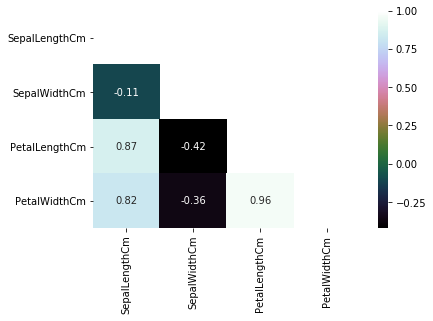

In [13]:

# correlation between features 
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data = corr, mask= mask, annot=True, cmap='cubehelix');

#### Observation:
- `PetalLenghtCm` is strongly **positively correlated** with `SepalLengthCm`. 
- With `SepalWidthCm` moderately **negatively correlated**.
- `PetalWidthCm` also strongly **positively correlated** with `SepalLengthCm` and `PetalLengthCm`.
- With `SepalWidthCm` moderately **negatively correlated**.

## Model Building

#### 1. Split the data into X and Y

In [14]:
X = data.drop('Species', axis=1)
y = data['Species']
print("Shape of the X={} and y={}".format(X.shape, y.shape))

Shape of the X=(150, 4) and y=(150,)


In [15]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, shuffle= True,
                                                   random_state = 42, stratify= y)
# stratify split data in balanced way according to the target class labels
print("Shape of Training data:",X_train.shape, y_train.shape)
print("Shape of Testing data:", X_test.shape, y_test.shape)

Shape of Training data: (105, 4) (105,)
Shape of Testing data: (45, 4) (45,)


In [16]:
y_train.value_counts()

Iris-versicolor    35
Iris-virginica     35
Iris-setosa        35
Name: Species, dtype: int64

#### 2. Model Building 

In [17]:
# instantiate the model with default parameters
dt = DecisionTreeClassifier(random_state= 42)

In [18]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [19]:
y_train_pred = dt.predict(X_train) # prediction on training data
y_test_pred = dt.predict(X_test) # prediction on testing data
print("F1 micro score on training data: {}".format(f1_score(y_train, y_train_pred, 
                                                            average='micro')))
print("F1 micro score on testing data: {:.4f}".format(f1_score(y_test, y_test_pred, 
                                                               average='micro')))

F1 micro score on training data: 1.0
F1 micro score on testing data: 0.9333


In [20]:
print("Accuracy of the model on training data:{}".format(accuracy_score(y_train, 
                                                                        y_train_pred)))
print("Accuracy of the model on testing data: {:.4f}".format(accuracy_score(y_test, 
                                                                            y_test_pred)))

Accuracy of the model on training data:1.0
Accuracy of the model on testing data: 0.9333


In [21]:
print("Confusion matrix of training data:,
      confusion_matrix(y_train, y_train_pred,labels= data['Species'].unique()))

array([[35,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 35]], dtype=int64)

- Since there is wide gap between the training accuracy and testing accuracy. 
- Model looks like **overfitting**.
- So we need to fine tune it. 

#### 3. Fine tuning of the model

In [22]:
# fix the depth of the tree to the 3
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [23]:
y_train_pred = dt.predict(X_train) # prediction on training data
y_test_pred = dt.predict(X_test) # prediction on testing data
print("F1 micro score on training data: {:.4f}".format(f1_score(y_train, y_train_pred, average='micro')))
print("F1 micro score on testing data: {:.4f}".format(f1_score(y_test, y_test_pred, average='micro')))

F1 micro score on training data: 0.9810
F1 micro score on testing data: 0.9778


In [24]:
print("Accuracy of the model on training data:{:.4f}".format(accuracy_score(y_train, y_train_pred)))
print("Accuracy of the model on testing data: {:.4f}".format(accuracy_score(y_test, y_test_pred)))

Accuracy of the model on training data:0.9810
Accuracy of the model on testing data: 0.9778


#### Decision tree Plot

In [25]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

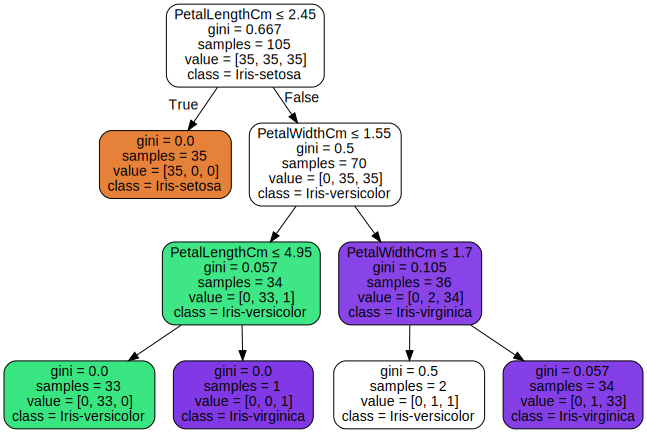

In [26]:
dot_data = export_graphviz(dt, out_file=None,
                                feature_names=X_train.columns,
                                class_names= data.Species.unique(), 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Observation:
- As we have observed in the `pairplot` that `PetalLenghtCm` and `PetalWidthCm` is the features.
- Which classify the species clearly.

![ThankYou](https://media.tenor.com/images/012ad1480e45e2309cb9fcc8e086e9c8/tenor.gif "Thank You")

Credit : [Source of Gif](https://tenor.com/search/thank-you-gifs)